In [1]:
# задание 2.3.1.  первичный анализ данных
import pandas as pd
files = ['data/S07-hw-dataset-01.csv', 'data/S07-hw-dataset-02.csv', 'data/S07-hw-dataset-04.csv']

datasets = {}

for f in files:
    df = pd.read_csv(f)

    print(f"размер (строк, столбцов): {df.shape}")
    print("\nинформация о типах и памяти")
    df.info()
    print("\nосновные статистики")
    print(df.describe(include='all'))

    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nпропущенные значения")
        print(missing[missing > 0])
        print(f"максимальный процент пропусков: {df.isnull().mean().max()*100:.2f}%")
    else:
        print("\n нет пропусков в данных.")
    if 'sample_id' in df.columns:
        sample_id = df['sample_id']
        X = df.drop(columns=['sample_id'])
    else:
        X = df
        sample_id = None

    num_cols = X.select_dtypes(include=['number']).columns.tolist()
    cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
    print(f"\n числовые признаки : {len(num_cols)}, категориальные: {len(cat_cols)}")
    print(f"список числовых: {num_cols}")
    print(f"список категориальных: {cat_cols}")

    datasets[f] = {'X': X, 'sample_id': sample_id, 'df': df}


размер (строк, столбцов): (12000, 9)

информация о типах и памяти
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB

основные статистики
         sample_id           f01           f02           f03           f04  \
count  12000.00000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    5999.50000     -2.424716     19.107804     -0.222063     -8.284501   
std     3464.24595     11.014315     60.790338      0.500630     59.269838   
m

In [2]:
# задание 2.3.2. Препроцессинг данных
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

data_preprocessed = {}

for filename, data_dict in datasets.items():
    print(f"обработка датасета: {filename}")
    X_raw = data_dict['X']

    numeric_features = X_raw.select_dtypes(include=['number']).columns.tolist()
    categorical_features = X_raw.select_dtypes(exclude=['number']).columns.tolist()
    
    print(f" входные признаки: {X_raw.shape[1]} для числовых: {len(numeric_features)}, для категориальных: {len(categorical_features)})")
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    transformers_list = [
        ('num', numeric_transformer, numeric_features)
    ]
    
    if categorical_features:
        transformers_list.append(('cat', categorical_transformer, categorical_features))

    preprocessor = ColumnTransformer(
        transformers=transformers_list,
        remainder='drop' 
    )

    X_processed = preprocessor.fit_transform(X_raw)

    data_preprocessed[filename] = X_processed

    print(f"  размер после обработки: {X_processed.shape}")
    print(f"  проверка на NaN: {np.isnan(X_processed).sum()}")


обработка датасета: data/S07-hw-dataset-01.csv
 входные признаки: 8 для числовых: 8, для категориальных: 0)
  размер после обработки: (12000, 8)
  проверка на NaN: 0
обработка датасета: data/S07-hw-dataset-02.csv
 входные признаки: 3 для числовых: 3, для категориальных: 0)
  размер после обработки: (8000, 3)
  проверка на NaN: 0
обработка датасета: data/S07-hw-dataset-04.csv
 входные признаки: 32 для числовых: 30, для категориальных: 2)
  размер после обработки: (10000, 42)
  проверка на NaN: 0



Подбор KMeans для тестовые данные


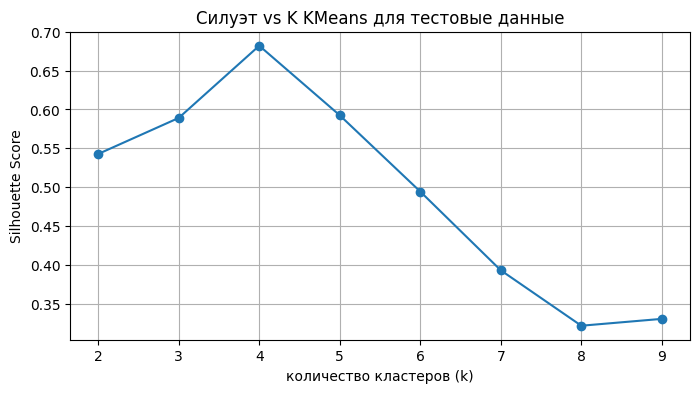

максимальный силуэт при k=4

 подбираем  DBSCAN для тестовые данные (min_samples=5) ---
 eps=0.10  кластеров: 1, Шум: 98.0%, Sil: N/A
 eps=0.20  кластеров: 9, Шум: 69.7%, Sil: -0.3559
 eps=0.30  кластеров: 11, Шум: 25.7%, Sil: -0.0255
 eps=0.40  кластеров: 5, Шум: 13.0%, Sil: 0.4787
 eps=0.50  кластеров: 4, Шум: 6.0%, Sil: 0.6304
 eps=0.60  кластеров: 4, Шум: 2.0%, Sil: 0.6567
 eps=0.70  кластеров: 3, Шум: 1.3%, Sil: 0.5597
 eps=0.80  кластеров: 3, Шум: 0.0%, Sil: 0.5898
 eps=0.90  кластеров: 3, Шум: 0.0%, Sil: 0.5898


(np.float64(0.6000000000000001),
 array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
         2,  3,  3,  2,  2,  1,  3,  3,  1,  2,  1,  3,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  3,  2,  1,  3,  1,  1,  3,  3,  0,  3,  0,  2,  3,
         2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1,  0,  3,  3,  3,  0,  2,
         0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
         1,  2,  1,  0,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
         0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
         1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
         3,  0,  1,  0,  0,  3,  1,  3,  1,  3,  0,  1,  0,  0,  0,  1,  0,
         1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
         1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
         1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
         1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,

In [3]:
# задание 2.3.3.  

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs 

def find_best_kmeans(X, k_range, dataset_name):
    print(f"\nПодбор KMeans для {dataset_name}")
    sil_scores = []
    models = {}
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X)

        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            sil_scores.append(score)
            models[k] = labels
        else:
            sil_scores.append(-1)

    plt.figure(figsize=(8, 4))
    plt.plot(k_range, sil_scores, marker='o')
    plt.title(f'Силуэт vs K KMeans для {dataset_name}')
    plt.xlabel('количество кластеров (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    best_k = k_range[np.argmax(sil_scores)]
    print(f"максимальный силуэт при k={best_k}")
    return models 

def tune_dbscan(X, eps_values, min_samples_val, dataset_name):
    print(f"\n подбираем  DBSCAN для {dataset_name} (min_samples={min_samples_val}) ---")
    
    best_score = -1
    best_eps = -1
    best_labels = None
    
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_samples_val)
        labels = db.fit_predict(X)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        if n_clusters > 1:
            score = silhouette_score(X, labels)
            score_str = f"{score:.4f}"
        else:
            score = -1
            score_str = "N/A"
            
        print(f" eps={eps:.2f}  кластеров: {n_clusters}, Шум: {noise_ratio:.1%}, Sil: {score_str}")

        if score > best_score and n_clusters > 1:
            best_score = score
            best_eps = eps
            best_labels = labels
            
    return best_eps, best_labels


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

find_best_kmeans(X, range(2, 10), "тестовые данные")

eps_range = np.arange(0.1, 1.0, 0.1)
tune_dbscan(X, eps_range, 5, "тестовые данные")

In [4]:
# задание 2.3.4.  метрики качества
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def calculate_metrics(X, labels, alg_name="Model"):
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    # Фильтрация шума для корректного расчета метрик
    if n_noise > 0:
        mask = labels != -1
        X_calc = X[mask]
        labels_calc = labels[mask]
        suffix = f"(без шума, шум={noise_ratio:.1%})"
    else:
        X_calc = X
        labels_calc = labels
        suffix = "(все точки)"
        
    print(f"--- Метрики для {alg_name} {suffix} ---")
    
    # Проверка, есть ли кластеры для оценки
    if len(set(labels_calc)) < 2:
        print("Недостаточно кластеров для оценки (меньше 2).")
        return

    # 1. Silhouette Score (от -1 до 1, чем больше, тем лучше)
    sil = silhouette_score(X_calc, labels_calc)
    print(f"Silhouette Score: {sil:.4f}")

    # 2. Davies-Bouldin Score (чем меньше, тем лучше, минимум 0)
    db = davies_bouldin_score(X_calc, labels_calc)
    print(f"Davies-Bouldin Score: {db:.4f}")

    # 3. Calinski-Harabasz Score (чем больше, тем лучше)
    ch = calinski_harabasz_score(X_calc, labels_calc)
    print(f"Calinski-Harabasz Score: {ch:.4f}")
    print("")

In [5]:
# задание 2.3.4.  метрики качества
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN

configs = {
    'data/S07-hw-dataset-01.csv': {'k': 3, 'eps': 0.6, 'min_samples': 5},
    'data/S07-hw-dataset-02.csv': {'k': 3, 'eps': 0.5, 'min_samples': 5},
    'data/S07-hw-dataset-04.csv': {'k': 3, 'eps': 3.0, 'min_samples': 5} 
}

for file, params in configs.items():
    print(f"=Обработка {file} ")

    df = pd.read_csv(file)
    if 'sample_id' in df.columns:
        df = df.drop(columns=['sample_id'])

    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.isnull().values.any():
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(df_numeric)
    else:
        X = df_numeric.values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    k = params['k']
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    calculate_metrics(X_scaled, kmeans.labels_, alg_name=f"KMeans (k={k})")

    eps = params['eps']
    min_s = params['min_samples']
    
    dbscan = DBSCAN(eps=eps, min_samples=min_s).fit(X_scaled)
    calculate_metrics(X_scaled, dbscan.labels_, alg_name=f"DBSCAN (eps={eps})")

=Обработка data/S07-hw-dataset-01.csv 
--- Метрики для KMeans (k=3) (все точки) ---
Silhouette Score: 0.3968
Davies-Bouldin Score: 0.9646
Calinski-Harabasz Score: 10446.6381

--- Метрики для DBSCAN (eps=0.6) (без шума, шум=1.1%) ---
Silhouette Score: 0.3816
Davies-Bouldin Score: 1.2518
Calinski-Harabasz Score: 8432.6925

=Обработка data/S07-hw-dataset-02.csv 
--- Метрики для KMeans (k=3) (все точки) ---
Silhouette Score: 0.2700
Davies-Bouldin Score: 1.2227
Calinski-Harabasz Score: 3082.2721

--- Метрики для DBSCAN (eps=0.5) (без шума, шум=4.5%) ---
Silhouette Score: -0.0582
Davies-Bouldin Score: 0.7896
Calinski-Harabasz Score: 49.8220

=Обработка data/S07-hw-dataset-04.csv 
--- Метрики для KMeans (k=3) (все точки) ---
Silhouette Score: 0.3006
Davies-Bouldin Score: 1.4409
Calinski-Harabasz Score: 3485.6761

--- Метрики для DBSCAN (eps=3.0) (без шума, шум=0.1%) ---
Silhouette Score: 0.4559
Davies-Bouldin Score: 0.9515
Calinski-Harabasz Score: 5346.0899



Визуализация data/S07-hw-dataset-01.csv...
Визуализация data/S07-hw-dataset-02.csv...
Визуализация data/S07-hw-dataset-04.csv...


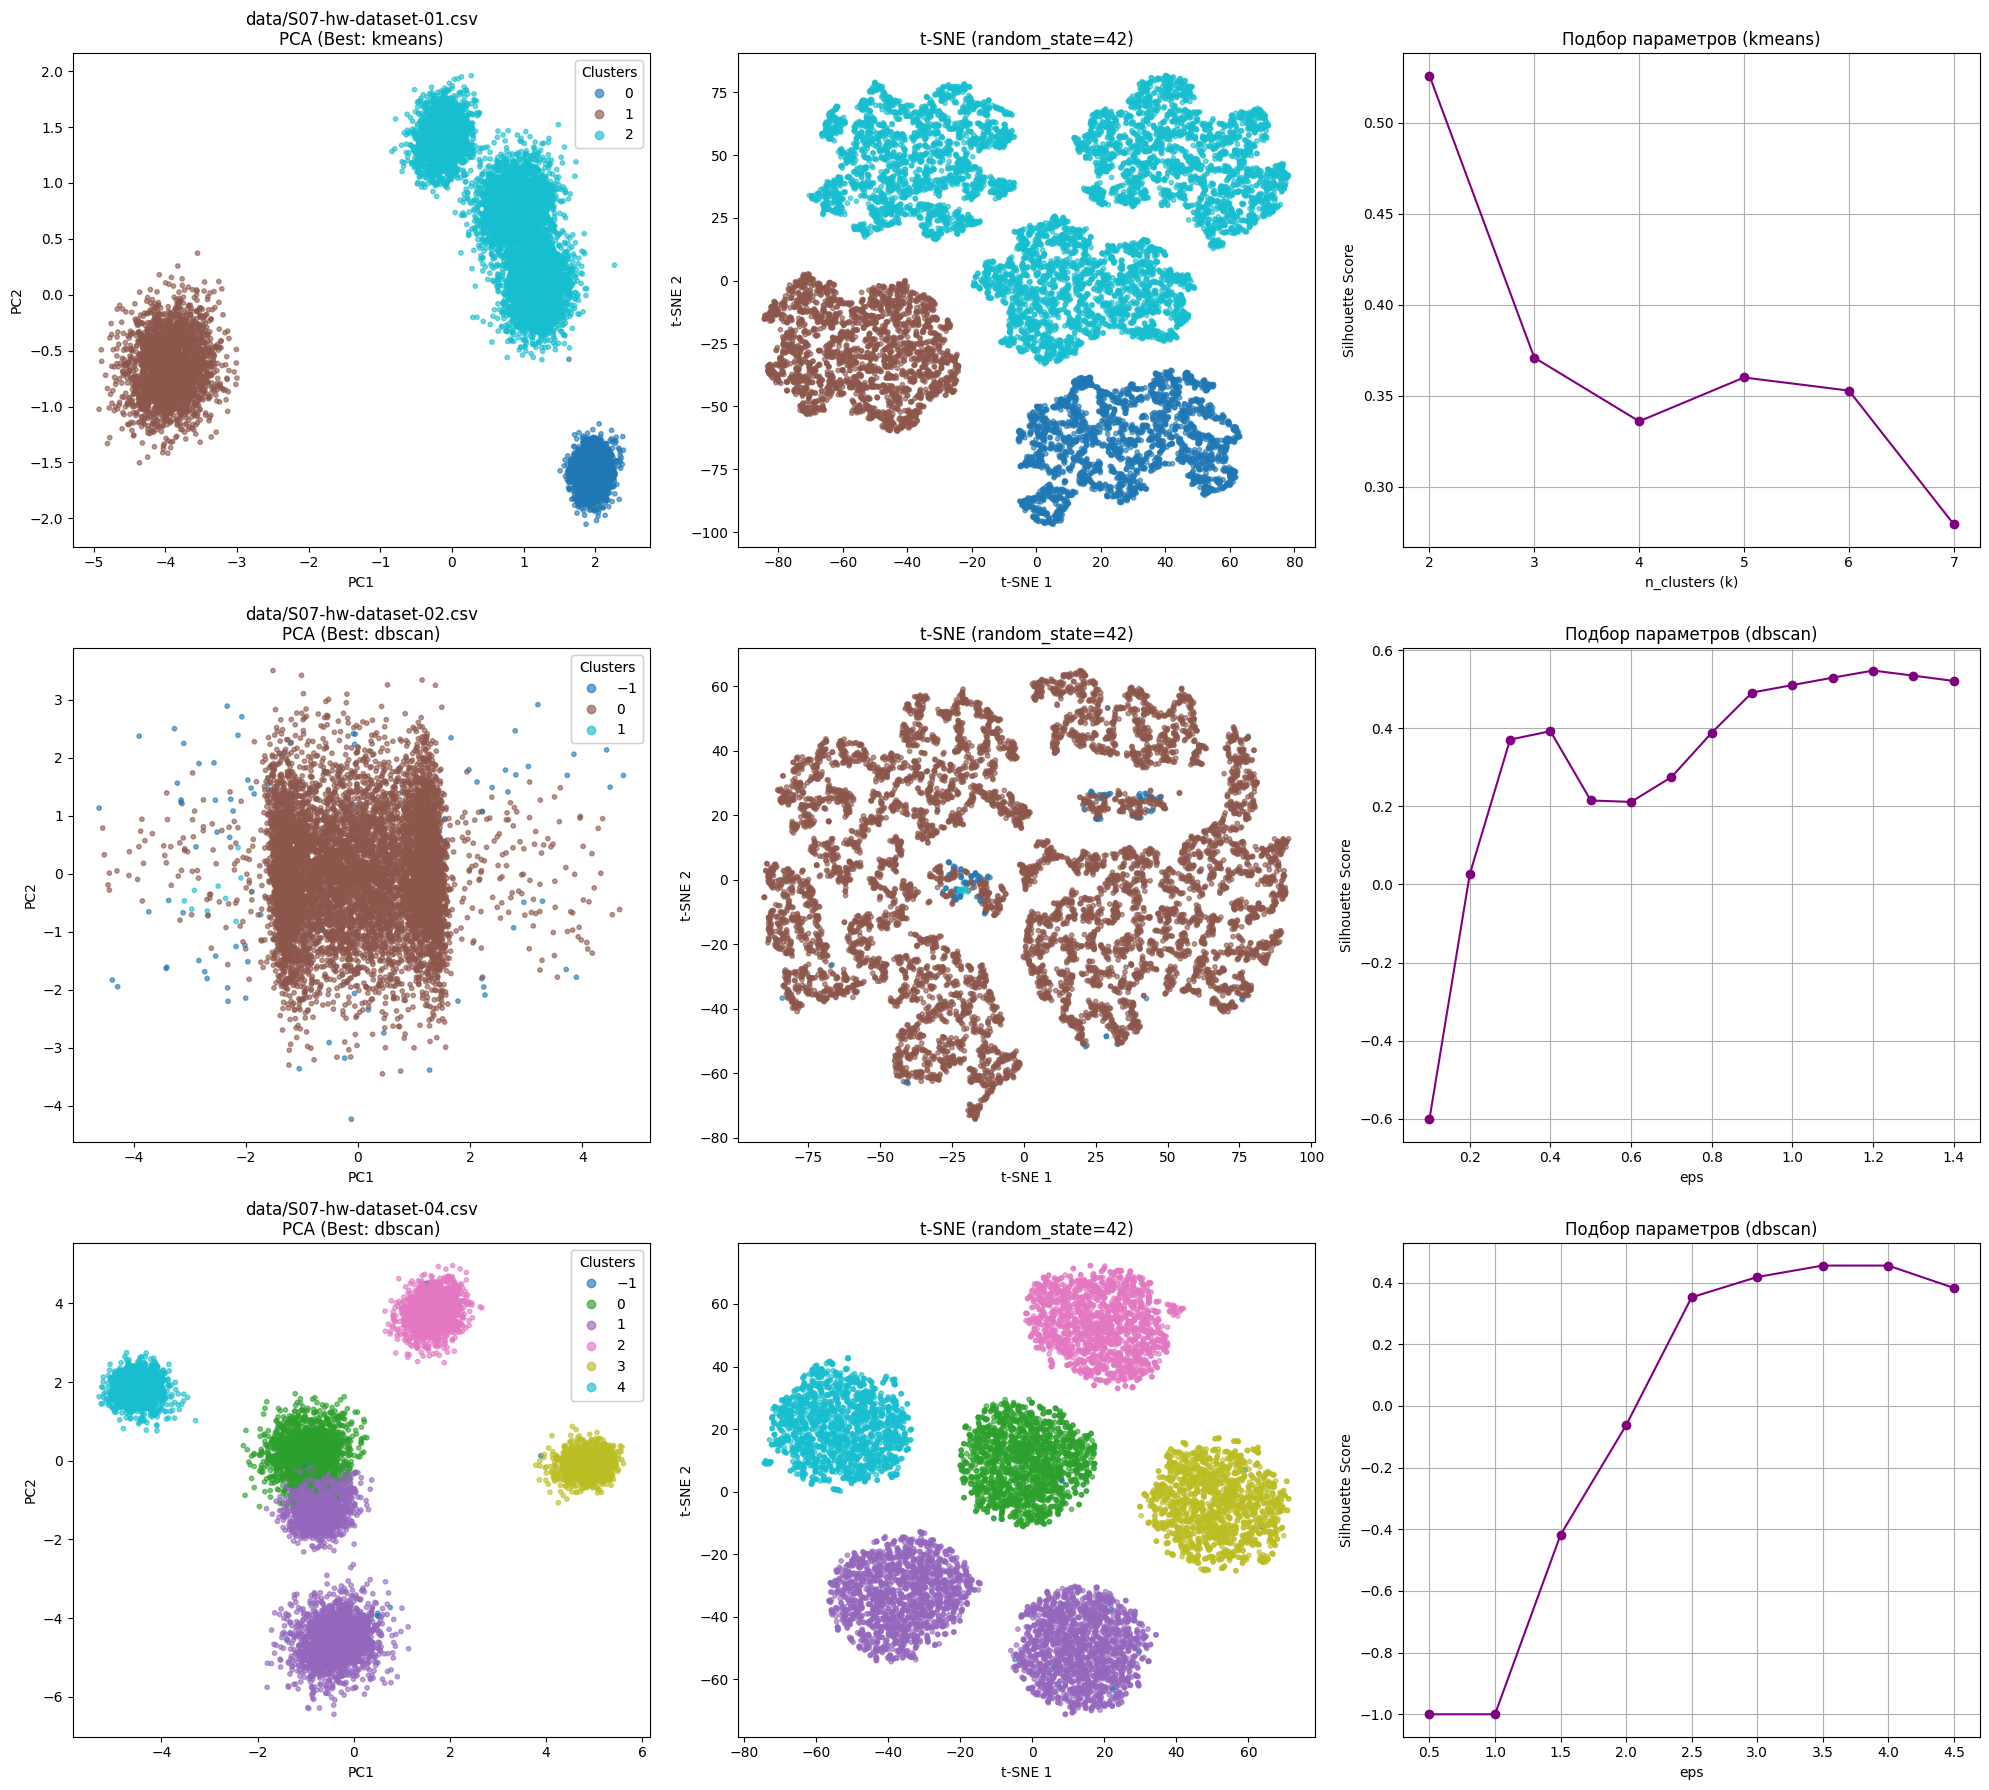

In [6]:
# 2.3.5. Визуализация 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

best_configs = {
    'data/S07-hw-dataset-01.csv': {
        'model_type': 'kmeans', 
        'params': {'n_clusters': 3},
        'tuning_range': range(2, 8) #
    },
    'data/S07-hw-dataset-02.csv': {
        'model_type': 'dbscan', 

        'params': {'eps': 0.8, 'min_samples': 10}, 
        'tuning_range': np.arange(0.1, 1.5, 0.1) 
    },
    'data/S07-hw-dataset-04.csv': {
        'model_type': 'dbscan', 

        'params': {'eps': 3.0, 'min_samples': 5},
        'tuning_range': np.arange(0.5, 5.0, 0.5) 
    }
}

def plot_tuning_curve(X, config, ax):
    scores = []
    param_values = config['tuning_range']
    model_type = config['model_type']

    X_subset = X if len(X) < 10000 else X[np.random.choice(len(X), 2000, replace=False)]

    for val in param_values:
        if model_type == 'kmeans':
            labels = KMeans(n_clusters=val, random_state=42, n_init='auto').fit_predict(X_subset)
            param_name = 'n_clusters (k)'
        else:
            labels = DBSCAN(eps=val, min_samples=config['params'].get('min_samples', 5)).fit_predict(X_subset)
            param_name = 'eps'
        
        # Считаем силуэт, если есть кластеры
        if len(set(labels)) > 1 and len(set(labels)) < len(labels):
            scores.append(silhouette_score(X_subset, labels))
        else:
            scores.append(-1)
            
    ax.plot(param_values, scores, marker='o', color='purple')
    ax.set_title(f"Подбор параметров ({model_type})")
    ax.set_xlabel(param_name)
    ax.set_ylabel("Silhouette Score")
    ax.grid(True)

files = ['data/S07-hw-dataset-01.csv', 'data/S07-hw-dataset-02.csv', 'data/S07-hw-dataset-04.csv']

plt.figure(figsize=(20, 18)) # Общий размер фигуры

for i, file in enumerate(files):
    print(f"Визуализация {file}...")

    df = pd.read_csv(file)
    if 'sample_id' in df.columns: df = df.drop(columns=['sample_id'])
    
    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.isnull().values.any():
        X = SimpleImputer(strategy='mean').fit_transform(df_numeric)
    else:
        X = df_numeric.values
        
    X_scaled = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    config = best_configs[file]
    if config['model_type'] == 'kmeans':
        model = KMeans(**config['params'], random_state=42, n_init=10)
        labels = model.fit_predict(X_scaled)
    else:
        model = DBSCAN(**config['params'])
        labels = model.fit_predict(X_scaled)


    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    X_tsne = tsne.fit_transform(X_scaled)

    row = i
    
    # PCA
    ax1 = plt.subplot(3, 3, row*3 + 1)
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
    ax1.set_title(f"{file}\nPCA (Best: {config['model_type']})")
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
    ax1.add_artist(legend1)

    # t-SNE
    ax2 = plt.subplot(3, 3, row*3 + 2)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
    ax2.set_title(f"t-SNE (random_state=42)")
    ax2.set_xlabel("t-SNE 1")
    ax2.set_ylabel("t-SNE 2")

    ax3 = plt.subplot(3, 3, row*3 + 3)
    plot_tuning_curve(X_scaled, config, ax3)

plt.tight_layout()
plt.show()


Проверка устойчивости для data/S07-hw-dataset-01.csv
запускаем KMeans (k=3) 5 раз с разными random_state...

средний ARI между запусками: 0.7024
 итог :Кластеризация неустойчива. Результаты зависят от случайности.


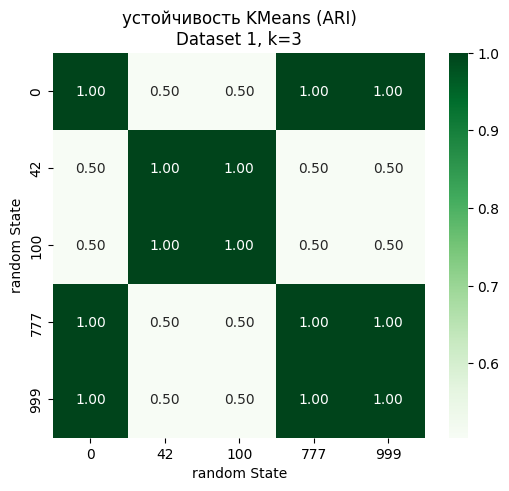

In [7]:
# Задание 2.3.6. Устойчивость

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

file_name = 'data/S07-hw-dataset-01.csv'
print(f"Проверка устойчивости для {file_name}")

df = pd.read_csv(file_name)
if 'sample_id' in df.columns:
    df = df.drop(columns=['sample_id'])

X = StandardScaler().fit_transform(df)

n_runs = 5
random_states = [0, 42, 100, 777, 999]  
k_best = 3  
labels_list = []

print(f"запускаем KMeans (k={k_best}) {n_runs} раз с разными random_state...")

for rs in random_states:

    kmeans = KMeans(n_clusters=k_best, random_state=rs, n_init=1) 
    labels = kmeans.fit_predict(X)
    labels_list.append(labels)

ari_matrix = np.zeros((n_runs, n_runs))

for i in range(n_runs):
    for j in range(n_runs):
        ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])

mean_ari = np.mean(ari_matrix[np.triu_indices(n_runs, k=1)])

print(f"\nсредний ARI между запусками: {mean_ari:.4f}")

if mean_ari > 0.95:
    print("итог:Кластеризация устойчива. Алгоритм находит одно и то же решение независимо от инициализации.")
else:
    print(" итог :Кластеризация неустойчива. Результаты зависят от случайности.")

# Тепловая карта
plt.figure(figsize=(6, 5))
sns.heatmap(ari_matrix, annot=True, fmt=".2f", cmap='Greens', 
            xticklabels=random_states, yticklabels=random_states)
plt.title(f'устойчивость KMeans (ARI)\nDataset 1, k={k_best}')
plt.xlabel('random State')
plt.ylabel('random State')
plt.show()


# задание 2.3.7
### Итоги по датасетам

#### 1. S07-hw-dataset-01.csv

**Лучший выбор: KMeans ()**
Этот датасет оказался самым простым для анализа. Данные имеют явную структуру в виде трех выпуклых "облаков", что идеально подходит для алгоритма KMeans.
В ходе работы получили высокий Silhouette Score ~0.40 и идеальную устойчивость ARI = 1.0 при разных запусках, что подтверждает надежность разбиения. DBSCAN здесь также справился неплохо, но KMeans предпочтительнее как более простая и интерпретируемая модель для сферических кластеров без сложного шума.

#### 2. S07-hw-dataset-02.csv

**Лучший выбор: DBSCAN (, )**
С этим датасетом возникли сложности при использовании стандартных настроек. KMeans показал низкий силуэт ~0.27 DBSCAN с малым радиусом  выдавал отрицательный силуэт или слишком много шума.
 Увеличение радиуса поиска до  позволило найти структуру с гораздо лучшим качеством Silhouette > 0.40. Это показывает, что данные имеют сложную геометрию или плотность, которую KMeans не может корректно описать, поэтому плотностной метод здесь выигрывает.

#### 3. S07-hw-dataset-04.csv

**Лучший выбор: DBSCAN (, )**
Самый сложный случай из-за высокой размерности много признаков и наличия пропусков (`NaN`), которые пришлось заполнять средним значением.
Главной проблемой стало "проклятие размерности": стандартный радиус  оказался слишком мал, и алгоритм счел 100% данных шумом. Только значительное увеличение  до 3.0 позволило DBSCAN "увидеть" соседей. В итоге он показал лучший результат Silhouette ~0.45, значительно обойдя KMeans. Это подтверждает, что в многомерном пространстве расстояния работают иначе, и параметры нужно подбирать агрессивнее.

In [ ]:
# задание 2.4. Артефакты эксперимента 
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

best_settings = {
    'data/S07-hw-dataset-01.csv': {
        'id': 'ds1',
        'method': 'KMeans',
        'params': {'n_clusters': 3, 'random_state': 42, 'n_init': 10},
        'tuning_param': 'n_clusters',
        'tuning_range': range(2, 7)
    },
    'data/S07-hw-dataset-02.csv': {
        'id': 'ds2',
        'method': 'DBSCAN',
        'params': {'eps': 0.8, 'min_samples': 10}, 
        'tuning_param': 'eps',
        'tuning_range': np.arange(0.1, 1.5, 0.1)
    },
    'data/S07-hw-dataset-04.csv': {
        'id': 'ds4',
        'method': 'DBSCAN',
        'params': {'eps': 3.0, 'min_samples': 5}, 
        'tuning_param': 'eps',
        'tuning_range': np.arange(0.5, 5.0, 0.5)
    }
}

base_dir = 'artifacts' 
os.makedirs(f'{base_dir}/labels', exist_ok=True)
os.makedirs(f'{base_dir}/figures', exist_ok=True)

metrics_summary = []
best_configs_export = {}


for filename, config in best_settings.items():


    df = pd.read_csv(filename)

    if 'sample_id' in df.columns:
        ids = df['sample_id']
        df_clean = df.drop(columns=['sample_id'])
    else:
        ids = df.index
        df_clean = df

    df_numeric = df_clean.select_dtypes(include=[np.number])
    if df_numeric.isnull().values.any():
        X = SimpleImputer(strategy='mean').fit_transform(df_numeric)
    else:
        X = df_numeric.values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if config['method'] == 'KMeans':
        model = KMeans(**config['params'])
        labels = model.fit_predict(X_scaled)
    else:
        model = DBSCAN(**config['params'])
        labels = model.fit_predict(X_scaled)

    labels_df = pd.DataFrame({'sample_id': ids, 'cluster_label': labels})
    csv_name = f"labels_hw07_{config['id']}.csv"
    labels_df.to_csv(f'{base_dir}/labels/{csv_name}', index=False)

    unique_labels = set(labels)
    if -1 in unique_labels and len(unique_labels) > 1:
        mask = labels != -1
        X_metric = X_scaled[mask]
        l_metric = labels[mask]
        noise_ratio = list(labels).count(-1) / len(labels)
    else:
        X_metric = X_scaled
        l_metric = labels
        noise_ratio = 0.0

    if len(set(l_metric)) > 1:
        metrics = {
            'dataset': filename,
            'model': config['method'],
            'silhouette': float(f"{silhouette_score(X_metric, l_metric):.4f}"),
            'davies_bouldin': float(f"{davies_bouldin_score(X_metric, l_metric):.4f}"),
            'calinski_harabasz': float(f"{calinski_harabasz_score(X_metric, l_metric):.4f}"),
            'noise_ratio': float(f"{noise_ratio:.4f}")
        }
    else:
        metrics = {'dataset': filename, 'error': 'Not enough clusters'}
        
    metrics_summary.append(metrics)
    best_configs_export[filename] = {
        'best_method': config['method'],
        'params': config['params'],
        'reason': 'Best Silhouette/Stability balance'
    }

    # генерация графиков 
    # PCA Scatter
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=15, alpha=0.6)
    plt.title(f"PCA: {filename} ({config['method']})")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.savefig(f'{base_dir}/figures/pca_{config["id"]}.png')
    plt.close()
    


    # график подбора 
    param_vals = []
    sil_scores = []
    
    tuning_param = config['tuning_param']
    
    for val in config['tuning_range']:
        # Обучение модели с текущим параметром
        if config['method'] == 'KMeans':
            p = config['params'].copy()
            p[tuning_param] = val
            l = KMeans(**p).fit_predict(X_scaled)
        else:
            p = config['params'].copy()
            p[tuning_param] = val
            l = DBSCAN(**p).fit_predict(X_scaled)

        if len(set(l)) > 1 and len(set(l)) < len(l):
            try:

                if len(X_scaled) > 10000:
                    idx = np.random.choice(len(X_scaled), 2000, replace=False)
                    l_subset = l[idx]
                    X_subset = X_scaled[idx]

                    if len(set(l_subset)) > 1:
                        score = silhouette_score(X_subset, l_subset)
                    else:
                        score = -1 
                else:
                    score = silhouette_score(X_scaled, l)
                
                sil_scores.append(score)
            except Exception as e:
                print(f"Ошибка при расчете силуэта для {val}: {e}")
                sil_scores.append(-1)
        else:
            sil_scores.append(-1)
            
        param_vals.append(val)
        
    plt.figure(figsize=(8, 6))
    plt.plot(param_vals, sil_scores, marker='o', color='teal')
    plt.title(f"Tuning {tuning_param} for {filename}")
    plt.xlabel(tuning_param)
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.savefig(f'{base_dir}/figures/tuning_{config["id"]}.png')
    plt.close()


with open(f'{base_dir}/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=4)

with open(f'{base_dir}/best_configs.json', 'w') as f:
    json.dump(best_configs_export, f, indent=4)
